# Preamble 

In [1]:
%matplotlib notebook 

In [2]:
import os
# os.chdir('/nfs/slac/g/ki/ki19/deuce/AEGIS/ismael/WeakLensingDeblending/')
os.chdir('/Users/Ismael/code/lensing/WeakLensingDeblending/')

import pickle 
from tqdm import tqdm 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

import mycode.tomo.tomo_fncs as tomo_fncs
import mycode.errors as errors
import mycode.preamble as preamble

import subprocess 

In [3]:
import matplotlib.image as mpimg

In [4]:
from importlib import reload
reload(tomo_fncs)
reload(errors)
reload(preamble)

<module 'mycode.preamble' from '/Users/Ismael/code/lensing/WeakLensingDeblending/mycode/preamble.py'>

# Simulate small region 

In [1]:
galaxy_dx = -149.79222/ 3600
galaxy_dy= -1514.9642/3600
print(galaxy_dx,galaxy_dy)

-0.04160895 -0.42082338888888887


In [105]:
# #this displays all 77 galaxies pertaining to this group. and obtains inf in fisher_error! 
# subprocess.run(f"./simulate.py --catalog-name OneDegSq.fits --image-width 400 --image-height 400\
#                --ra-center {galaxy_dx} --dec-center {galaxy_dy}\
#                --survey-name LSST --filter-band i --output-name demo3 --verbose",shell=True)

CompletedProcess(args='./simulate.py --catalog-name OneDegSq.fits --image-width 400 --image-height 400               --ra-center -0.04160895 --dec-center -0.42082338888888887               --survey-name LSST --filter-band i --output-name demo --verbose', returncode=0)

In [15]:
# #simulate one of the 100 boxes where the above galaxy and its group is found. 
# subprocess.run(f"./simulate.py --catalog-name OneDegSq.fits --image-width 1800 --image-height 1800\
#                --ra-center -0.05 --dec-center -0.45\
#                --survey-name LSST --filter-band r --output-name demo2 --verbose",shell=True)

CompletedProcess(args='./simulate.py --catalog-name OneDegSq.fits --image-width 1800 --image-height 1800               --ra-center -0.05 --dec-center -0.45               --survey-name LSST --filter-band r --output-name demo2r --verbose', returncode=0)

In [6]:
subprocess.run(f"./simulate.py --catalog-name OneDegSq.fits --image-width 1800 --image-height 1800\
               --ra-center {galaxy_dx} --dec-center {galaxy_dy}\
               --survey-name LSST --filter-band i --output-name demo4 --verbose",shell=True)

CompletedProcess(args='./simulate.py --catalog-name OneDegSq.fits --image-width 1800 --image-height 1800               --ra-center -0.04160895 --dec-center -0.42082338888888887               --survey-name LSST --filter-band i --output-name demo4 --verbose', returncode=0)

# Display catalogue 

In [7]:
# import fitsio
# fits = fitsio.FITS('demo4.fits')

from astropy.table import Table
cat = Table.read('demo4.fits')

In [19]:
cat2 = Table.read('demo2.fits') #1800x1800
cat3 = Table.read('demo3.fits') #600x600
cat2r = Table.read('demo2r.fits')
cat3r = Table.read('demo3r.fits')

In [30]:
temp_cat = cat3[cat3['grp_id']==402700140027]
temp_cat[temp_cat['snr_grpf']<=1]

db_id,grp_id,grp_size,grp_rank,visible,xmin,xmax,ymin,ymax,f_disk,f_bulge,dx,dy,z,ab_mag,ri_color,flux,sigma_m,sigma_p,e1,e2,a,b,beta,psf_sigm,purity,snr_sky,snr_iso,snr_grp,snr_isof,snr_grpf,ds,dg1,dg2,ds_grp,dg1_grp,dg2_grp,hsm_sigm,hsm_e1,hsm_e2,g1_fit,g2_fit
int64,int64,int16,int16,int16,int32,int32,int32,int32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32
402700317352,402700140027,77,5,1,202,259,94,159,0.0030702716,0.9969297,-13.751777,-34.653625,2.1285295,22.157358,-0.07343292,974999.3,0.9909661,0.99892664,-0.06497416,-0.06147545,1.0839506,0.90595806,-1.1919281,1.1699818,0.9956906,135.27013,132.44862,0.0,47.37668,0.0,0.036255125,0.017934237,0.0179169,inf,inf,inf,0.5428824,-0.12517038,-0.1184333,0.0,0.0
402700816955,402700140027,77,10,1,236,264,266,303,0.86107886,0.13892116,-9.883493,-2.9916515,1.280879,23.135595,0.50860786,396013.03,0.72288203,0.871628,-0.16890927,0.39551574,1.1450833,0.4563497,0.98720556,1.000092,0.9799146,69.312355,68.64918,0.0,40.583496,0.0,0.035864778,0.021769762,0.029098345,inf,inf,inf,0.6302273,-0.28320223,0.6631362,0.0,0.0
402707740766,402700140027,77,39,1,232,244,263,275,1.0,0.0,-12.332176,-6.063532,1.5344297,26.26904,0.039274216,22096.93,0.27646264,0.276996,-0.025326122,0.03585917,0.2888781,0.26458076,1.0928577,0.6775608,0.3436452,6.1361666,6.1284037,0.0,4.0179906,0.0,0.58703727,0.54506326,0.54743814,inf,inf,inf,0.42460737,-0.04938328,0.06476382,0.0,0.0
402716690667,402700140027,77,71,1,249,257,175,183,1.0,0.0,-9.323893,-24.171125,3.4275966,27.895054,0.05575943,4942.265,0.26269558,0.26347727,-0.045225427,-0.030427525,0.27742717,0.24874625,-1.2746791,0.67213714,0.1266364,1.3777599,1.3773502,0.0,0.7776696,0.0,3.2651742,2.8838952,2.893904,inf,inf,inf,0.3939032,-0.045263823,-0.035440568,0.0,0.0
402708035135,402700140027,77,40,1,235,247,154,166,0.97466666,0.02533337,-11.699191,-27.885233,2.8799727,26.307016,-0.029922485,21337.377,0.24799398,0.2500882,-0.035532523,0.084537275,0.27188087,0.22620574,0.9843472,0.6669406,0.67467505,6.117656,6.1096845,0.0,4.027875,0.0,0.6723467,0.6167826,0.6288652,inf,inf,inf,0.411604,-0.06990247,0.15821885,0.0,0.0
402710772481,402700140027,77,55,1,234,245,181,192,0.39644152,0.6035585,-11.981996,-22.526287,2.8162072,26.849684,-0.0104599,12944.166,0.33297992,0.33321926,0.008550812,-0.025406199,0.34202886,0.32417035,-0.6230705,0.70243174,0.07457644,3.1217594,3.1198146,0.0,1.4200622,0.0,1.6267946,1.1348472,1.137792,inf,inf,inf,0.43969816,0.025420588,-0.043811053,0.0,0.0
402709150119,402700140027,77,47,1,240,249,234,244,0.9739643,0.026035719,-11.025008,-12.14249,2.188078,26.748497,-0.03552246,14208.519,0.14702152,0.18281084,0.023058085,0.46255615,0.24271023,0.08905816,0.7604942,0.644243,0.060194522,4.4813223,4.476592,0.0,3.061417,0.0,3.400618,1.4020175,3.3572943,inf,inf,inf,0.3752643,0.041225504,0.7126951,0.0,0.0
402713211933,402700140027,77,67,1,219,229,210,220,1.0,0.0,-15.081261,-16.880451,1.7322038,27.291328,0.008043289,8618.193,0.5380374,0.53805786,-0.0014375735,0.005985695,0.5413598,0.53473544,0.90325016,0.8196999,0.39818782,1.7538841,1.75338,1.7527798,0.8659034,0.86251354,1.6156367,1.3254678,1.3015714,1.6182191,1.3259771,1.3020855,0.5151683,-0.0018278215,0.024149228,0.0,0.0
402707943577,402700140027,77,36,1,216,226,218,228,1.0,0.0,-15.629273,-15.264796,0.8136723,26.351868,0.8845005,20473.896,0.08500352,0.1002956,-0.088285446,0.39514834,0.130605,0.055324048,0.8953049,0.62642473,0.9198785,6.8451056,6.8334117,0.0,4.930587,0.0,4.905376,2.4757,4.849336,inf,inf,inf,0.35704222,-0.15571198,0.67288506,0.0,0.0


In [29]:
temp_cat = cat2[cat2['grp_id']==402700140027]
temp_cat[temp_cat['snr_grpf']<=1]

db_id,grp_id,grp_size,grp_rank,visible,xmin,xmax,ymin,ymax,f_disk,f_bulge,dx,dy,z,ab_mag,ri_color,flux,sigma_m,sigma_p,e1,e2,a,b,beta,psf_sigm,purity,snr_sky,snr_iso,snr_grp,snr_isof,snr_grpf,ds,dg1,dg2,ds_grp,dg1_grp,dg2_grp,hsm_sigm,hsm_e1,hsm_e2,g1_fit,g2_fit
int64,int64,int16,int16,int16,int32,int32,int32,int32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32
402700317352,402700140027,77,5,1,953,1010,1219,1284,0.0030702716,0.9969297,16.455126,70.38217,2.1285295,22.157358,-0.07343292,974999.3,0.9909661,0.99892664,-0.06497416,-0.06147545,1.0839506,0.90595806,-1.1919281,1.1699818,0.99572355,135.27017,132.44867,0.0,47.377506,0.0,0.03625446,0.017933955,0.017916923,inf,inf,inf,0.54289377,-0.12521805,-0.11843984,0.0,0.0
402712049563,402700140027,77,62,1,993,1004,1222,1233,1.0,0.0,19.77023,65.59636,1.8938355,27.073038,0.09739876,10537.373,0.47755712,0.4837769,0.008216394,-0.11345416,0.53535473,0.42599943,-0.74925107,0.783713,0.78072184,2.3094473,2.3085396,0.0,1.2717329,0.0,1.2036716,0.98527646,1.0229579,inf,inf,inf,0.5039048,0.00696199,-0.20649022,0.0,0.0
402706865901,402700140027,77,33,1,953,964,1228,1238,1.0,0.0,11.8779125,66.676,0.8493703,26.146076,0.77157784,24746.69,0.109531835,0.12632972,0.36767495,0.08083813,0.16273776,0.07372119,0.108209826,0.63105565,0.90084845,8.1243105,8.108181,0.0,5.7866874,0.0,2.4069884,2.3752124,1.3480262,inf,inf,inf,0.36350206,0.6372579,0.14418612,0.0,0.0
402700768092,402700140027,77,9,1,956,980,1214,1236,0.92059404,0.07940595,13.6579895,65.07687,0.9846882,23.111479,0.67048836,404907.72,0.33703348,0.38603926,0.16899775,-0.32614204,0.49547234,0.22925915,-0.5463584,0.72291684,0.9965755,103.624,101.62278,0.0,66.10347,0.0,0.03821785,0.026536569,0.033277526,inf,inf,inf,0.45548218,0.30069527,-0.5802535,0.0,0.0
402700816955,402700140027,77,10,1,987,1015,1392,1428,0.86107886,0.13892116,20.323393,102.04415,1.280879,23.135595,0.50860786,396013.03,0.72288203,0.871628,-0.16890927,0.39551574,1.1450833,0.4563497,0.98720556,1.000092,0.97990566,69.312355,68.64918,0.0,40.582752,0.0,0.03586529,0.021770218,0.0290981,inf,inf,inf,0.6302268,-0.28320184,0.6631359,0.0,0.0
402707740766,402700140027,77,39,1,983,995,1389,1400,1.0,0.0,17.87472,98.97227,1.5344297,26.26904,0.039274216,22096.93,0.27646264,0.276996,-0.025326122,0.03585917,0.2888781,0.26458076,1.0928577,0.6775608,0.34381735,6.13581,6.128047,0.0,4.013419,0.0,0.5878922,0.5467476,0.54673654,inf,inf,inf,0.42462367,-0.04841143,0.06743389,0.0,0.0
402703151103,402700140027,77,15,1,978,992,1387,1401,0.9359856,0.06401439,17.088964,98.91755,1.3181,24.821213,0.476408,83842.164,0.15037444,0.2037975,-0.007962364,0.54305065,0.2763542,0.08182425,0.7927288,0.6500082,0.9083645,26.217825,26.059046,0.0,17.694841,0.0,0.72066784,0.2167415,0.7109524,inf,inf,inf,0.3802199,-0.012844913,0.8762988,0.0,0.0
402716690667,402700140027,77,71,1,1000,1008,1300,1308,1.0,0.0,20.882992,80.86468,3.4275966,27.895054,0.05575943,4942.265,0.26269558,0.26347727,-0.045225427,-0.030427525,0.27742717,0.24874625,-1.2746791,0.67213714,0.124526665,1.3802779,1.3798686,0.0,0.79566145,0.0,3.196662,2.8250744,2.860185,inf,inf,inf,0.39725584,-0.091927804,-0.06365473,0.0,0.0
402708035135,402700140027,77,40,1,986,998,1280,1291,0.97466666,0.02533337,18.507702,77.150566,2.8799727,26.307016,-0.029922485,21337.377,0.24799398,0.2500882,-0.035532523,0.084537275,0.27188087,0.22620574,0.9843472,0.6669406,0.6751828,6.117717,6.1097455,0.0,4.029017,0.0,0.6724192,0.6172917,0.62831753,inf,inf,inf,0.41178066,-0.07013971,0.16447964,0.0,0.0


In [23]:
cat2[cat2['db_id']==402700857466]

db_id,grp_id,grp_size,grp_rank,visible,xmin,xmax,ymin,ymax,f_disk,f_bulge,dx,dy,z,ab_mag,ri_color,flux,sigma_m,sigma_p,e1,e2,a,b,beta,psf_sigm,purity,snr_sky,snr_iso,snr_grp,snr_isof,snr_grpf,ds,dg1,dg2,ds_grp,dg1_grp,dg2_grp,hsm_sigm,hsm_e1,hsm_e2,g1_fit,g2_fit
int64,int64,int16,int16,int16,int32,int32,int32,int32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32
402700857466,402700140027,77,11,1,1035,1066,1415,1434,0.96156365,0.038436327,30.20778,105.035774,1.5986731,23.44294,0.5132847,298381.34,0.46015733,0.6118579,0.50931984,-0.13437444,0.82650155,0.25619406,-0.12897663,0.83122915,0.9966413,67.43038,66.66593,66.665764,42.772346,42.7708,0.057388503,0.052050166,0.026883619,0.057389513,0.05205069,0.02688436,0.5125568,0.81264263,-0.2143985,0.0,0.0


In [21]:
cat3[cat3['db_id']==402700857466]

db_id,grp_id,grp_size,grp_rank,visible,xmin,xmax,ymin,ymax,f_disk,f_bulge,dx,dy,z,ab_mag,ri_color,flux,sigma_m,sigma_p,e1,e2,a,b,beta,psf_sigm,purity,snr_sky,snr_iso,snr_grp,snr_isof,snr_grpf,ds,dg1,dg2,ds_grp,dg1_grp,dg2_grp,hsm_sigm,hsm_e1,hsm_e2,g1_fit,g2_fit
int64,int64,int16,int16,int16,int32,int32,int32,int32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32
402700857466,402700140027,77,11,1,284,315,290,309,0.96156365,0.038436327,0.0009323748,-2.29072e-05,1.5986731,23.44294,0.5132847,298381.34,0.46015733,0.6118579,0.50931984,-0.13437444,0.82650155,0.25619406,-0.12897663,0.83122915,0.9966234,67.43039,66.66593,0.0,42.77191,0.0,0.05738892,0.05205073,0.026883794,inf,inf,inf,0.51255715,0.8126415,-0.21439959,0.0,0.0


In [8]:
cat[cat['db_id']==402700857466]

db_id,grp_id,grp_size,grp_rank,visible,xmin,xmax,ymin,ymax,f_disk,f_bulge,dx,dy,z,ab_mag,ri_color,flux,sigma_m,sigma_p,e1,e2,a,b,beta,psf_sigm,purity,snr_sky,snr_iso,snr_grp,snr_isof,snr_grpf,ds,dg1,dg2,ds_grp,dg1_grp,dg2_grp,hsm_sigm,hsm_e1,hsm_e2,g1_fit,g2_fit
int64,int64,int16,int16,int16,int32,int32,int32,int32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32
402700857466,402700140027,77,11,1,884,915,890,909,0.96156365,0.038436327,0.0009323748,-2.29072e-05,1.5986731,23.44294,0.5132847,298381.34,0.46015733,0.6118579,0.50931984,-0.13437444,0.82650155,0.25619406,-0.12897663,0.83122915,0.9966234,67.43039,66.66593,66.665764,42.773693,42.772076,0.057377808,0.05204369,0.026899872,0.057378884,0.052044224,0.026900653,0.51255715,0.8126415,-0.21439959,0.0,0.0


In [24]:
cat2r[cat2r['db_id']==402700857466]

db_id,grp_id,grp_size,grp_rank,visible,xmin,xmax,ymin,ymax,f_disk,f_bulge,dx,dy,z,ab_mag,ri_color,flux,sigma_m,sigma_p,e1,e2,a,b,beta,psf_sigm,purity,snr_sky,snr_iso,snr_grp,snr_isof,snr_grpf,ds,dg1,dg2,ds_grp,dg1_grp,dg2_grp,hsm_sigm,hsm_e1,hsm_e2,g1_fit,g2_fit
int64,int64,int16,int16,int16,int32,int32,int32,int32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32
402700857466,402700293644,84,11,1,1035,1066,1415,1434,0.96156365,0.038436327,30.20778,105.035774,1.5986731,23.956224,0.5132847,251148.6,0.46015733,0.6118579,0.50931984,-0.13437444,0.82650155,0.25619406,-0.12897663,0.8214758,0.9921185,66.10088,65.25025,65.24965,42.004993,40.647533,0.061053053,0.05553833,0.028431501,0.061831776,0.055966783,0.028855305,0.5243963,0.81374,-0.21468708,0.0,0.0


In [25]:
cat3r[cat3r['db_id']==402700857466]

db_id,grp_id,grp_size,grp_rank,visible,xmin,xmax,ymin,ymax,f_disk,f_bulge,dx,dy,z,ab_mag,ri_color,flux,sigma_m,sigma_p,e1,e2,a,b,beta,psf_sigm,purity,snr_sky,snr_iso,snr_grp,snr_isof,snr_grpf,ds,dg1,dg2,ds_grp,dg1_grp,dg2_grp,hsm_sigm,hsm_e1,hsm_e2,g1_fit,g2_fit
int64,int64,int16,int16,int16,int32,int32,int32,int32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32
402700857466,402700293644,84,11,1,234,265,240,259,0.96156365,0.038436327,0.0009323748,-2.29072e-05,1.5986731,23.956224,0.5132847,251148.6,0.46015733,0.6118579,0.50931984,-0.13437444,0.82650155,0.25619406,-0.12897663,0.8214758,0.99217904,66.100845,65.25021,65.24963,42.00448,40.656326,0.061054774,0.055539448,0.028431525,0.061833605,0.05596218,0.028855165,0.52439654,0.8137363,-0.21468706,0.0,0.0


## Test 

In [22]:
cat[cat['grp_id']==402700140027]

db_id,grp_id,grp_size,grp_rank,visible,xmin,xmax,ymin,ymax,f_disk,f_bulge,dx,dy,z,ab_mag,ri_color,flux,sigma_m,sigma_p,e1,e2,a,b,beta,psf_sigm,purity,snr_sky,snr_iso,snr_grp,snr_isof,snr_grpf,ds,dg1,dg2,ds_grp,dg1_grp,dg2_grp,hsm_sigm,hsm_e1,hsm_e2,g1_fit,g2_fit
int64,int64,int16,int16,int16,int32,int32,int32,int32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32


# Display image 

In [6]:
from IPython.display import Image

In [12]:
!./display.py --input-name demo3.fits --select 'db_id==402700857466' --clip-lo-noise-fraction 0.05 --magnification 2 --output-name finder_temp2.png 


Figure(1200x1200)


<IPython.core.display.Javascript object>


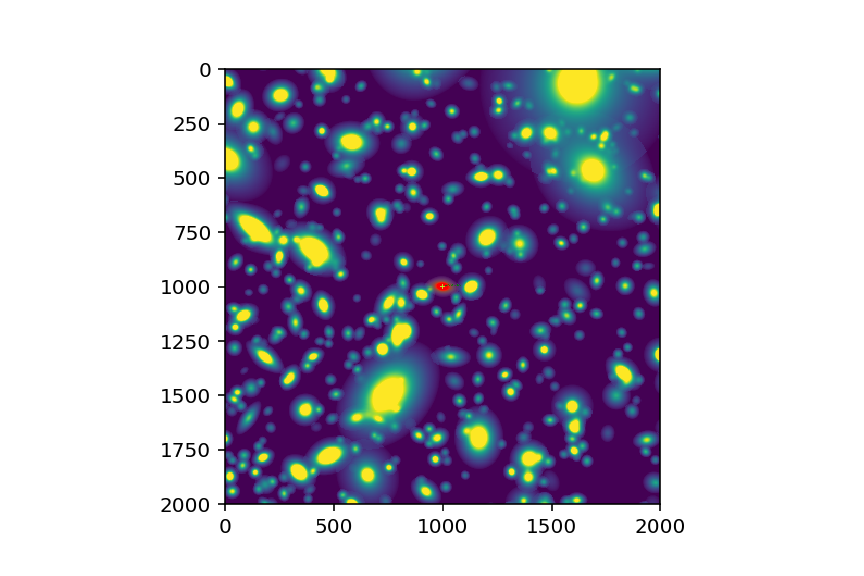

In [110]:
img = mpimg.imread('finder.png')
plt.imshow(img)

In [114]:
!./fisher.py -i demo.fits --group 402700140027 -o fisher_test 

^C
Traceback (most recent call last):
  File "./fisher.py", line 248, in <module>
    main()
  File "./fisher.py", line 237, in main
    draw(fisher_row,fisher_col,stamp.array)
  File "./fisher.py", line 158, in draw
    axes = plt.subplot(nrows,ncols,row*ncols+col+1)
  File "/Users/Ismael/anaconda3/envs/galsim/lib/python3.6/site-packages/matplotlib/pyplot.py", line 1072, in subplot
    a = fig.add_subplot(*args, **kwargs)
  File "/Users/Ismael/anaconda3/envs/galsim/lib/python3.6/site-packages/matplotlib/figure.py", line 1241, in add_subplot
    self.sca(a)
  File "/Users/Ismael/anaconda3/envs/galsim/lib/python3.6/site-packages/matplotlib/figure.py", line 1821, in sca
    self._axstack.bubble(a)
  File "/Users/Ismael/anaconda3/envs/galsim/lib/python3.6/site-packages/matplotlib/figure.py", line 120, in bubble
    return Stack.bubble(self, self._entry_from_axes(a))
  File "/Users/Ismael/anaconda3/envs/galsim/lib/python3.6/site-packages/matplotlib/cbook/__init__.py", line 1246, in bubble


# what is our grid division? 

In [51]:
num_sections=10
endpoint2 = (1.-1./num_sections)/2 #in degrees. 
endpoint1 = -endpoint2
grid_x = set()
grid_y = set()
for i,x in enumerate(np.linspace(endpoint1,endpoint2, num_sections)):
    for j,y in enumerate(np.linspace(endpoint1,endpoint2, num_sections)):
        #get grid boundaries in degrees 
        grid_x.add(round(x-0.05,3))
        grid_x.add(round(x+0.05,3))
        grid_y.add(round(y-0.05,3))
        grid_y.add(round(y+0.05,3))

        #print(f"c:({x},{y}), xs:({x-0.05},{x+0.05}), ys:({y-0.05,y+0.05})")

In [53]:
print(grid_x)
print(grid_y)

{-0.5, -0.4, -0.2, -0.3, -0.1, 0.0, 0.1, 0.2, 0.3, 0.4, 0.5}
{-0.5, -0.4, -0.2, -0.3, -0.1, 0.0, 0.1, 0.2, 0.3, 0.4, 0.5}
